# Barcelona DataSet
using the population data set
it has the following features:
* year
* District.Code
* District.Name
* Neighbourhood.Code
* Neighbourhood.Name
* Gender
* Age
* Number

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-colorblind')

df_population is the dataframe that contains the population data set which describes the population

In [2]:
df_population=pd.read_csv("population.csv")
df_population.head()

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Gender,Age,Number
0,2017,1,Ciutat Vella,1,el Raval,Male,0-4,224
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Male,0-4,50
2,2017,1,Ciutat Vella,3,la Barceloneta,Male,0-4,43
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,0-4,95
4,2017,2,Eixample,5,el Fort Pienc,Male,0-4,124


* the size of the dataset is checked using the shape function


In [3]:
df_population.shape

(70080, 8)

# bar graph

In [4]:
pop_dist=pd.pivot_table(df_population,index='District.Name',values='Number',aggfunc=np.sum)

In [5]:
pop_dist

,Number
District.Name,
Ciutat Vella,505596
Eixample,1322624
Gràcia,603888
Horta-Guinardó,837271
Les Corts,408045
Nou Barris,826372
Sant Andreu,733648
Sant Martí,1168555
Sants-Montjuïc,907153


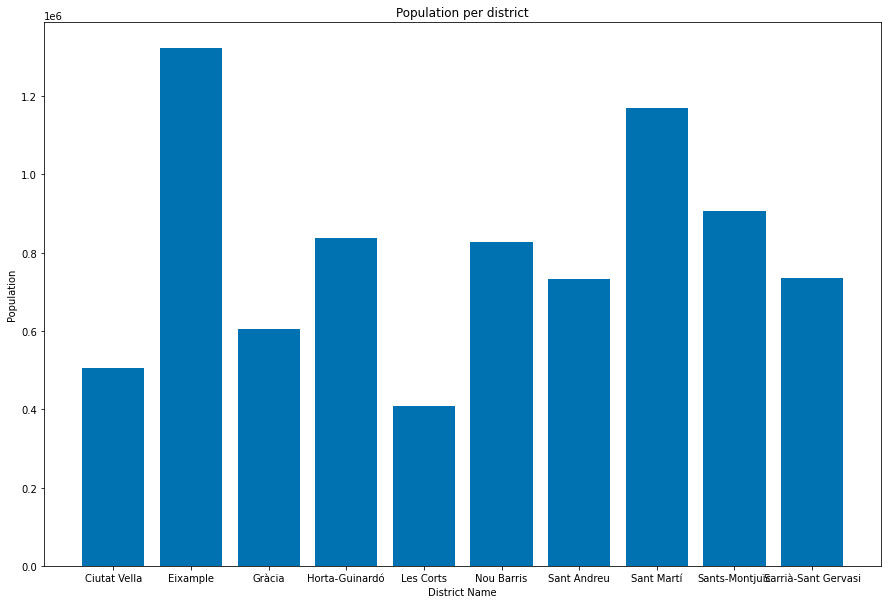

In [9]:
plt.figure(figsize=(15,10))
plt.bar(pop_dist.index, pop_dist['Number'])
plt.xlabel('District Name')
plt.ylabel('Population')
plt.title('Population per district')
plt.savefig('1. Bargraph.png', dpi=300)
plt.show()

# Pie Chart

In [23]:
d_pop={}
#taking male as 1 and female as 0
gender_num = {"Gender":     {"Male": 1, "Female": 0}}
df_population=df_population.replace(gender_num)


In [24]:
df_population.head()

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Gender,Age,Number
0,2017,1,Ciutat Vella,1,el Raval,1,0-4,224
1,2017,1,Ciutat Vella,2,el Barri Gòtic,1,0-4,50
2,2017,1,Ciutat Vella,3,la Barceloneta,1,0-4,43
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",1,0-4,95
4,2017,2,Eixample,5,el Fort Pienc,1,0-4,124


In [25]:
# total population
total=df_population['Gender'].sum()

# Ratio of population per district
for i in range( df_population['District.Name'].nunique()):
    c=df_population["District.Name"].unique()[i]
    c_population=df_population[df_population["District.Name"] == c]["Gender"].sum()
    d_pop[c]=c_population/total

print(d_pop)

{'Ciutat Vella': 0.0547945205479452, 'Eixample': 0.0821917808219178, 'Sants-Montjuïc': 0.1095890410958904, 'Les Corts': 0.0410958904109589, 'Sarrià-Sant Gervasi': 0.0821917808219178, 'Gràcia': 0.0684931506849315, 'Horta-Guinardó': 0.1506849315068493, 'Nou Barris': 0.1780821917808219, 'Sant Andreu': 0.0958904109589041, 'Sant Martí': 0.136986301369863}


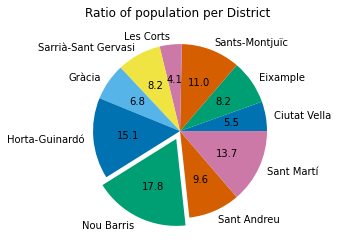

In [26]:
plt.pie([x*100 for x in d_pop.values()], 
       labels = [x for x in d_pop.keys()], 
       autopct = '%0.1f', explode = [0,0,0,0,0,0,0,0.1,0,0]
       )
plt.title('Ratio of population per District ')
plt.savefig('3.  piechart.png', dpi=300)
plt.show()

# data set 2

In [28]:
df_birth=pd.read_csv("births.csv")
df_birth.head()

,Year,District Code,District Name,Neighborhood Code,Neighborhood Name,Gender,Number
0,2017,1,Ciutat Vella,1,el Raval,Boys,283
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Boys,56
2,2017,1,Ciutat Vella,3,la Barceloneta,Boys,51
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Boys,90
4,2017,2,Eixample,5,el Fort Pienc,Boys,117


In [29]:
birth_dist=pd.pivot_table(df_birth,index='District Name',values='Number',aggfunc=np.sum)

In [30]:
birth_dist

,Number
District Name,
Ciutat Vella,4073
Eixample,10357
Gràcia,5263
Horta-Guinardó,6675
Les Corts,3127
No consta,11
Nou Barris,7062
Sant Andreu,6423
Sant Martí,10368


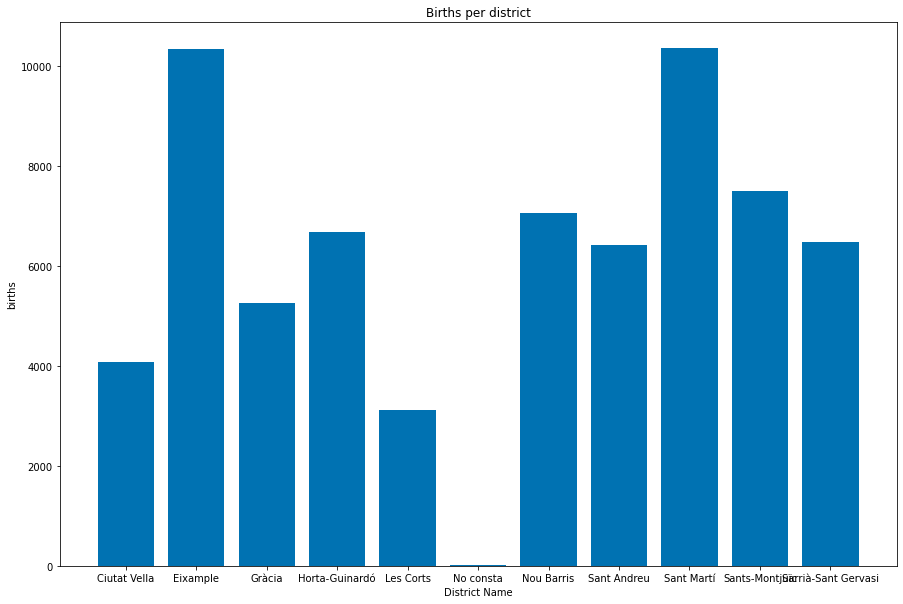

In [31]:
plt.figure(figsize=(15,10))
plt.bar(birth_dist.index, birth_dist['Number'])
plt.xlabel('District Name')
plt.ylabel('births')
plt.title('Births per district')
plt.savefig('2. Bargraph_birth.png', dpi=300)
plt.show()

# pie chart

In [33]:
d_birth={}
# total population
total=df_birth['Number'].sum()

# Ratio of population per district
for i in range( df_birth['District Name'].nunique()):
    c=df_birth["District Name"].unique()[i]
    c_birth=df_birth[df_birth["District Name"] == c]["Number"].sum()
    d_birth[c]=c_birth/total

print(d_birth)

{'Ciutat Vella': 0.06047692581813862, 'Eixample': 0.15378333432321672, 'Sants-Montjuïc': 0.11134703331947497, 'Les Corts': 0.04643048048939835, 'Sarrià-Sant Gervasi': 0.09636514818554374, 'Gràcia': 0.07814634436063432, 'Horta-Guinardó': 0.0991120745976124, 'Nou Barris': 0.10485834768664251, 'Sant Andreu': 0.0953703153768486, 'Sant Martí': 0.15394666508285323, 'No consta': 0.00016333075963651482}


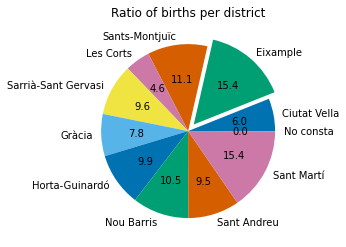

In [37]:
plt.pie([x*100 for x in d_birth.values()], 
       labels = [x for x in d_birth.keys()], 
       autopct = '%0.1f', explode = [0,0.1,0,0,0,0,0,0,0,0,0]
       )
plt.title('Ratio of births per district')
plt.savefig('3.  piechart_ birth.png', dpi=300)
plt.show()